# Titanic
_Thibaud Perrin_  
_Started: 14/02/2022_

## Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import os
import re

## New approach

### Load dataset

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

### Exploring datasets
Printing first 5 rows

In [3]:
print(f"train.shape = {train.shape}")
train.head()

train.shape = (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(f"test.shape = {test.shape}")
test.head()

test.shape = (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Missing values:**  
We can see that some features have missings values :
 - Age have 19.87% missing values
 - Cabin have 77.10% missing values
 - Embarked have 0.22 missing values

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


**Missing values:**  
We can see that some features have missings values :
 - Age have 20.57% missing values
 - Fare have 0.24% missing values
 - Cabin have 78.23% missing values

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Bar Chart
We will measure the number of survivors inside categorical features, in order to find some patterns.  
_(Pclass / Sex / SibSp / Parch / Cabin / Embarked)_

In [9]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df = df.reindex(sorted(df.columns), axis=1)
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5), title=feature)

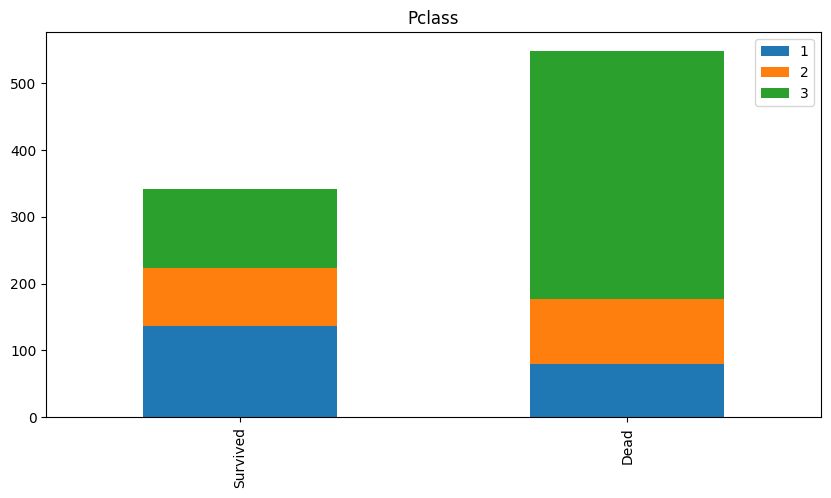

In [10]:
bar_chart('Pclass')

The chart show 1rst class are more likely to survived than other classes and the 3rd class are more likely to died than other classes.

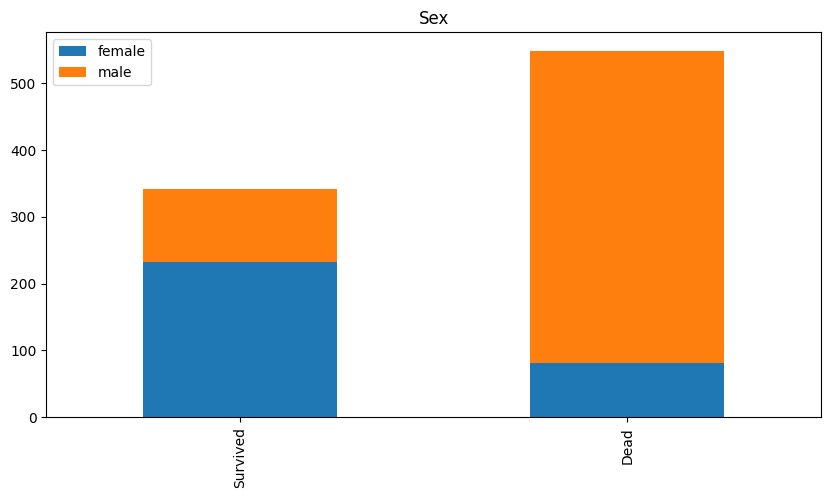

In [11]:
bar_chart('Sex')

The Chart show Women are more likely to survive than men

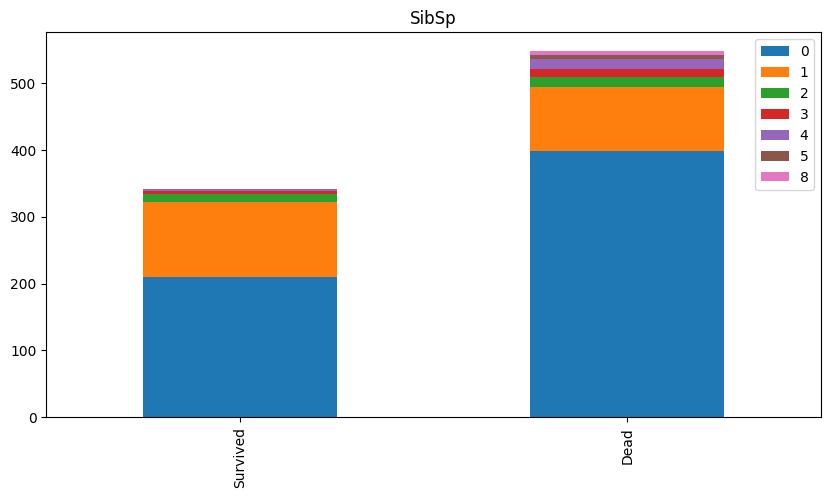

In [12]:
bar_chart('SibSp')

The chart show that person alone are more likely to die than other

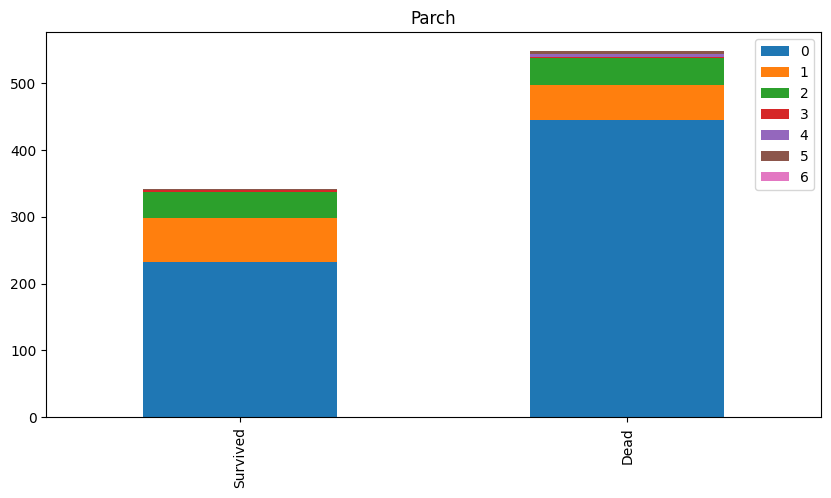

In [13]:
bar_chart('Parch')

This chart show the same thing than the previous chart, person alone are more likely to die than other

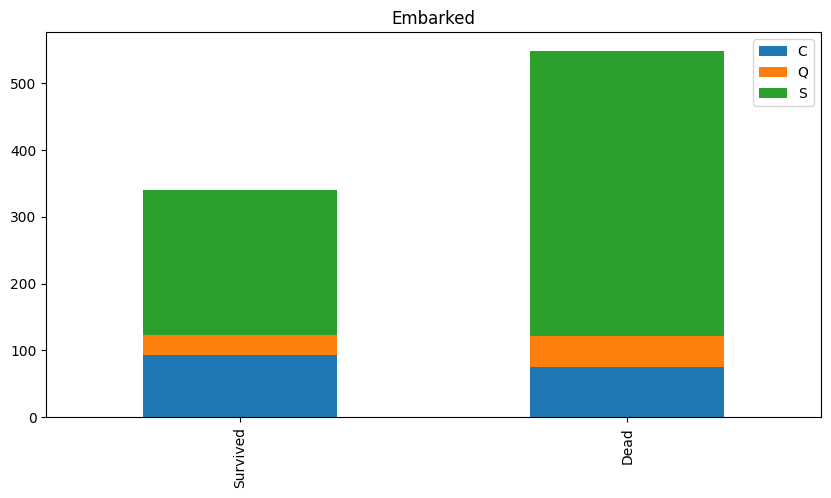

In [14]:
bar_chart('Embarked')

The chart show that person aboarded from C slightly more likely to survived than other, and people from Q are more likely to die than others

## Feature Engineering
#### Name

In [15]:
train_test = [train, test]

In [16]:
for d in train_test:
    d['Qualification'] = d['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [17]:
train['Qualification'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Qualification, dtype: int64

In [18]:
test['Qualification'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Qualification, dtype: int64

**Code of qualifications retained**  
1. Mr: 0
2. Miss: 1
3. Mrs: 2
4. Others: 3

In [19]:
qualification_mapping = {
    "Mr": 0, "Miss": 1, "Mrs": 2,
    "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Countess": 3,
    "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona": 3, "Mme": 3, "Capt": 3, "Sir": 3
}
for d in train_test:
    d['Qualification'] = d['Qualification'].map(qualification_mapping)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Qualification
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [21]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Qualification
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


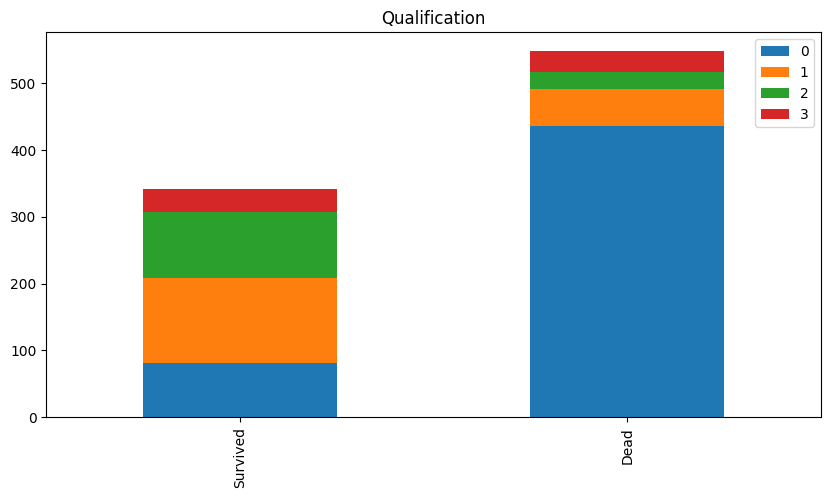

In [22]:
bar_chart('Qualification')

The chart show that Men are more likely to die

##### Cleaning dataset

In [23]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Qualification
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [25]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Qualification
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


#### Sex
male: 0, female: 1

In [26]:
sex_mapping = { "male": 0, "female": 1 }
for d in train_test:
    d['Sex'] = d['Sex'].map(sex_mapping)

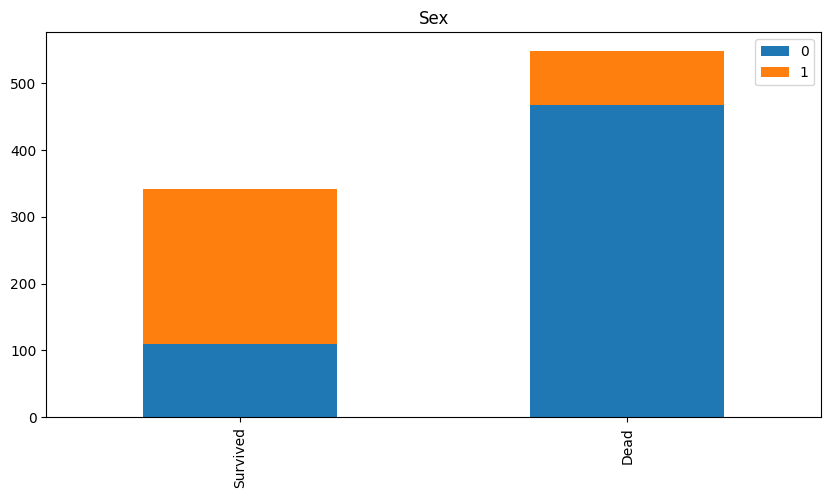

In [27]:
bar_chart('Sex')

#### Age
To fixed missing ages we will replace Nan values by median Age of each Qualifications

In [28]:
train.head(6)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Qualification
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0


In [29]:
train['Age'].fillna(train.groupby('Qualification')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Qualification')['Age'].transform('median'), inplace=True)

In [30]:
def kde_chart(feature, kind='kde'):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    tmp_df = pd.DataFrame({'Survived' : survived, 'Dead' : dead})
    tmp_df['Survived'] = tmp_df['Survived'] / max(tmp_df['Survived'].abs().max(), tmp_df['Dead'].abs().max())
    tmp_df['Dead'] = tmp_df['Dead'] / max(tmp_df['Survived'].abs().max(), tmp_df['Dead'].abs().max())
    tmp_df.plot(kind=kind, figsize=(10, 5), stacked=False, title=feature, xlim=(0, train[feature].max()))

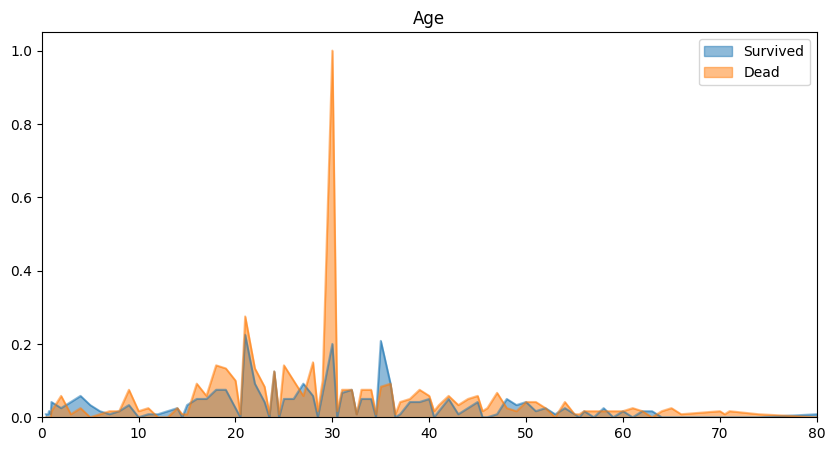

In [31]:
kde_chart('Age', 'area')

In [32]:
train.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Qualification      0
dtype: int64

In [33]:
test.isnull().sum()

PassengerId        0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               1
Cabin            327
Embarked           0
Qualification      0
dtype: int64

**We fixed Age Nan**

#### Grouping ages
1. child: 0 (<=11)
2. teenagers: 1 (11-18)
2. young: 2 (18-22)
3. young-adult: 3 (22-27)
4. mid-age: 4 (27-33)
5. old: 5 (33-40)
5. senior: 6 (40-66+)

In [34]:
len(train['Age'])

891

In [35]:
np.median(train['Age'])

30.0

In [36]:
for d in train_test:
    d.loc[d['Age'] <= 11, 'Age'] = 0
    d.loc[(d['Age'] > 11) & (d['Age'] <= 18), 'Age'] = 1
    d.loc[(d['Age'] > 18) & (d['Age'] <= 22), 'Age'] = 2
    d.loc[(d['Age'] > 22) & (d['Age'] <= 27), 'Age'] = 3
    d.loc[(d['Age'] > 27) & (d['Age'] <= 33), 'Age'] = 4
    d.loc[(d['Age'] > 33) & (d['Age'] <= 40), 'Age'] = 5
    d.loc[(d['Age'] > 40) & (d['Age'] <= 66), 'Age'] = 6
    d.loc[ d['Age'] > 66, 'Age'] = 6
    d['Age'] = d['Age'].astype(int)

##### Checking distribution

In [37]:
train['Age'].value_counts()

4    245
6    150
2    128
5    118
3    106
0     73
1     71
Name: Age, dtype: int64

In [38]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Qualification
0,1,0,3,0,2,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,5,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,3,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,5,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,5,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,4,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,6,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,3,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,1,1,0,237736,30.0708,NaN,C,2


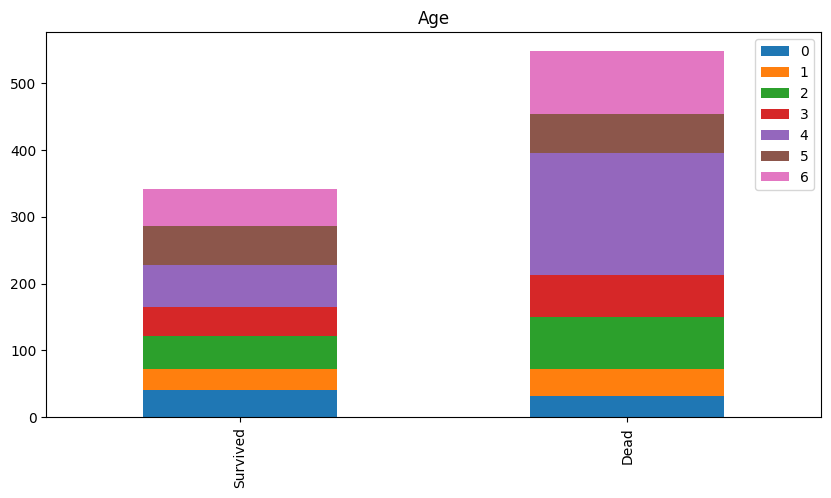

In [39]:
bar_chart('Age')

### Embarked

<Axes: >

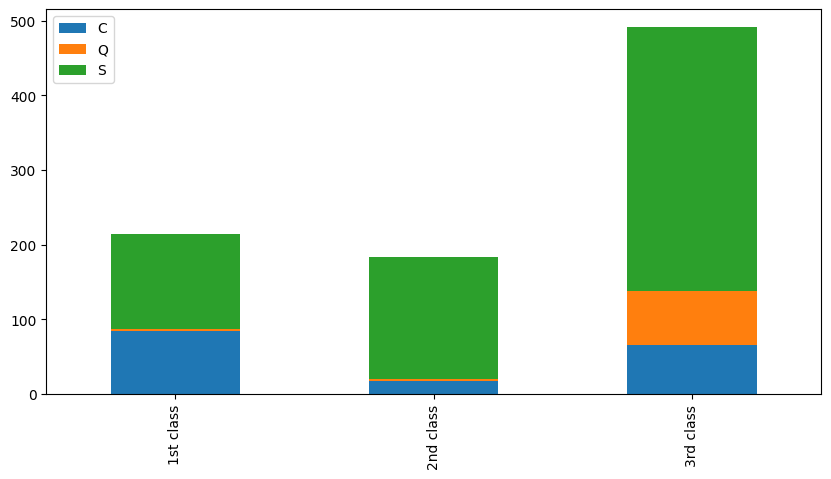

In [40]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df = df.reindex(sorted(df.columns), axis=1)
df.plot(kind='bar', stacked=True, figsize=(10, 5))

S represent more than 50% of embarked people in each class en Q is mainly present in the 3rd class  
##### Replace missing embark with S

In [41]:
for d in train_test:
    d['Embarked'] = d['Embarked'].fillna('S')

In [42]:
train.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
Qualification      0
dtype: int64

In [43]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Qualification
0,1,0,3,0,2,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,5,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,3,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,5,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,5,0,0,373450,8.0500,NaN,S,0


In [44]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for d in train_test:
    d['Embarked'] = d['Embarked'].map(embarked_mapping)

In [45]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Qualification
0,1,0,3,0,2,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,5,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,3,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,5,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,5,0,0,373450,8.0500,NaN,0,0


### Fare
##### Fill missing values with median for each Pclass

In [46]:
for d in train_test:
    d['Fare'].fillna(d.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [47]:
test.isnull().sum()

PassengerId        0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            327
Embarked           0
Qualification      0
dtype: int64

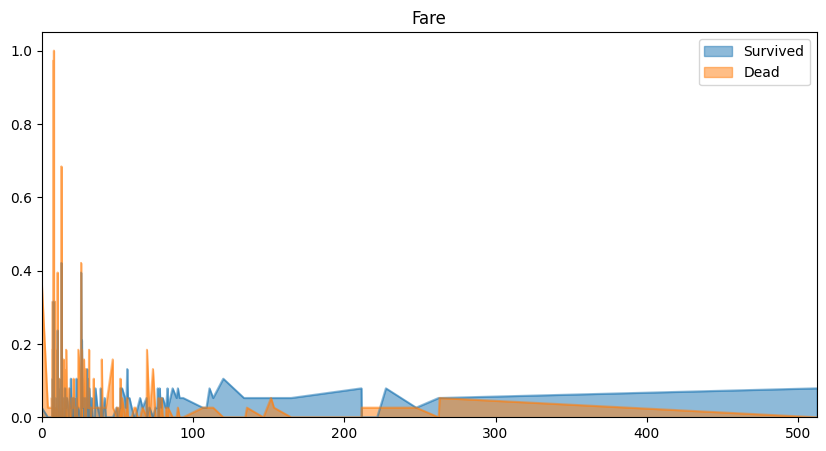

In [48]:
kde_chart('Fare', 'area')

#### Grouping fares
1. really cheap: 0
2. cheap: 1
3. faire: 2
4. medium: 3
4. expensive: 4
4. gold: 5

In [49]:
pd.qcut(train['Fare'], 4)

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [50]:
for d in train_test:
    d.loc[d['Fare'] <= 7.91, 'Fare'] = 0
    d.loc[(d['Fare'] > 7.91) & (d['Fare'] <= 14.454), 'Fare'] = 1
    d.loc[(d['Fare'] > 14.454) & (d['Fare'] <= 31.0), 'Fare'] = 2
    d.loc[(d['Fare'] > 31.0) & (d['Fare'] <= 99), 'Fare'] = 3
    d.loc[(d['Fare'] > 99) & (d['Fare'] <= 250), 'Fare'] = 4
    d.loc[ d['Fare'] > 250, 'Fare'] = 5
    d['Fare'] = d['Fare'].astype(int)

In [51]:
train['Fare'].value_counts()

2    229
0    223
1    217
3    169
4     44
5      9
Name: Fare, dtype: int64

In [52]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Qualification
0,1,0,3,0,2,1,0,A/5 21171,0,NaN,0,0
1,2,1,1,1,5,1,0,PC 17599,3,C85,1,2
2,3,1,3,1,3,0,0,STON/O2. 3101282,1,NaN,0,1
3,4,1,1,1,5,1,0,113803,3,C123,0,2
4,5,0,3,0,5,0,0,373450,1,NaN,0,0


### Cabin
##### extract first char

In [53]:
train.groupby('Pclass').Cabin.value_counts()

Pclass  Cabin      
1       B96 B98        4
        C23 C25 C27    4
        C22 C26        3
        B18            2
        B20            2
                      ..
3       F G73          2
        E10            1
        F E69          1
        F G63          1
        F38            1
Name: Cabin, Length: 147, dtype: int64

In [54]:
# mapping between 0 en 2
deck_mapping = {"A": 0, "B": 0.25, "C": 0.5, "D": 0.75, "E": 1, "F": 1.25, "G": 1.5, "T": 1.75, "U": 2}

In [55]:
for d in train_test:
    d['Cabin'] = d['Cabin'].fillna('U0')
    d['Deck'] = d['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    d['Deck'] = d['Deck'].map(deck_mapping)

In [56]:
train.groupby('Pclass').Deck.value_counts()

Pclass  Deck
1       0.50     59
        0.25     47
        2.00     40
        0.75     29
        1.00     25
        0.00     15
        1.75      1
2       2.00    168
        1.25      8
        0.75      4
        1.00      4
3       2.00    479
        1.25      5
        1.50      4
        1.00      3
Name: Deck, dtype: int64

<Axes: >

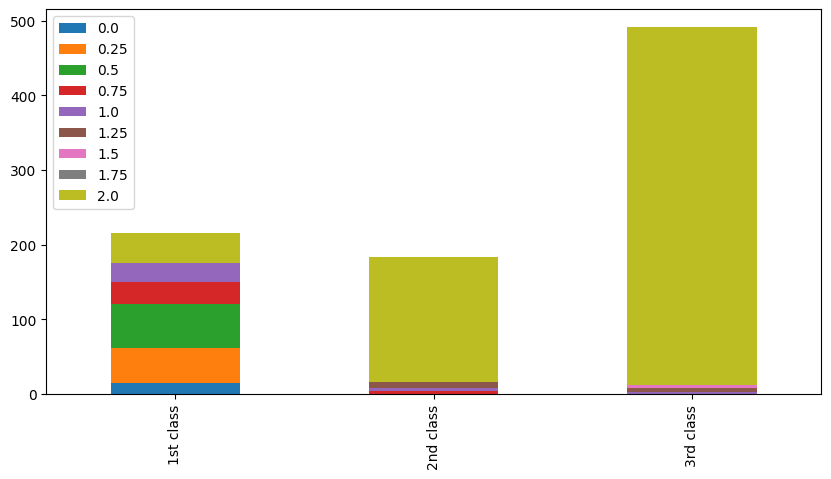

In [57]:
Pclass1 = train[train['Pclass'] == 1]['Deck'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Deck'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Deck'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df = df.reindex(sorted(df.columns), axis=1)
df.plot(kind='bar', stacked=True, figsize=(10, 5))

In [58]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

##### Replace missing Cabin values by median of each Class

In [59]:
# for d in train_test:
    # d['Cabin'].fillna(d.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Qualification,Deck
0,1,0,3,0,2,1,0,A/5 21171,0,0,0,2.0
1,2,1,1,1,5,1,0,PC 17599,3,1,2,0.5
2,3,1,3,1,3,0,0,STON/O2. 3101282,1,0,1,2.0
3,4,1,1,1,5,1,0,113803,3,0,2,0.5
4,5,0,3,0,5,0,0,373450,1,0,0,2.0


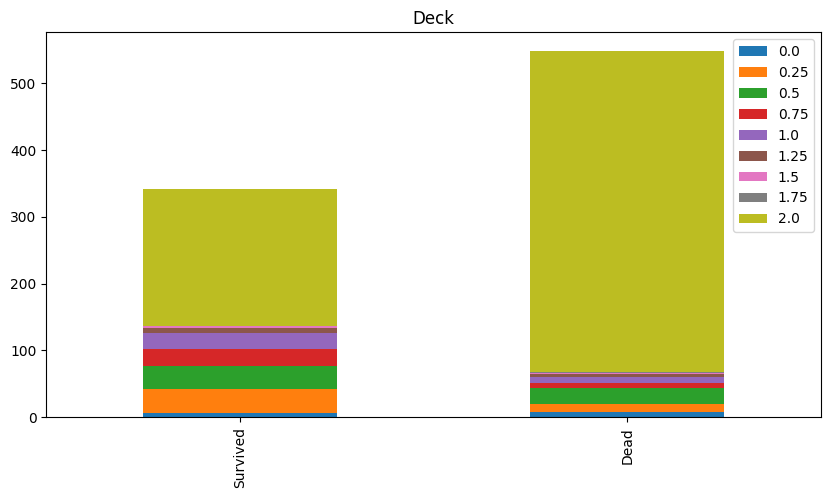

In [61]:
bar_chart('Deck')

### Age time Class

In [62]:
train['Age_Class'] = train['Age'] * train['Pclass']
test['Age_Class'] = test['Age'] * test['Pclass']

In [63]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Qualification,Deck,Age_Class
0,1,0,3,0,2,1,0,A/5 21171,0,0,0,2.0,6
1,2,1,1,1,5,1,0,PC 17599,3,1,2,0.5,5
2,3,1,3,1,3,0,0,STON/O2. 3101282,1,0,1,2.0,9
3,4,1,1,1,5,1,0,113803,3,0,2,0.5,5
4,5,0,3,0,5,0,0,373450,1,0,0,2.0,15


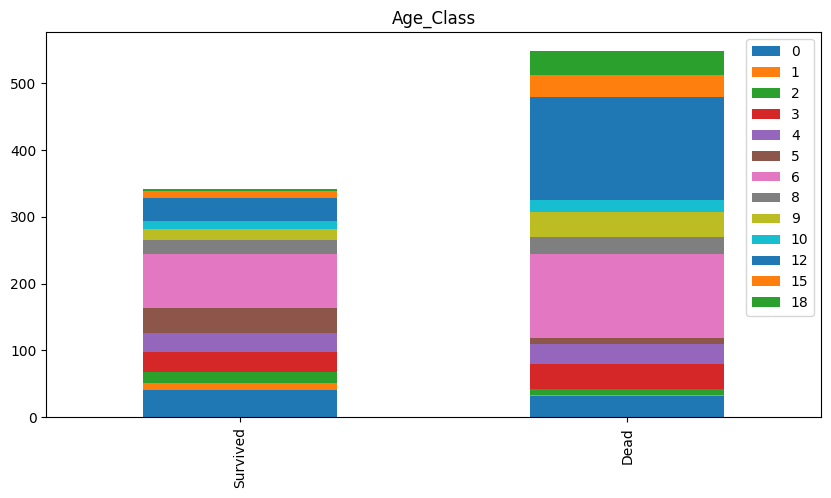

In [64]:
bar_chart('Age_Class')

### Fare per Person

In [65]:
train['Fare_Per_Person'] = train['Fare'] / (train['SibSp'] + train['Parch'] + 1)
train['Fare_Per_Person'] = train['Fare_Per_Person'].astype(int)
test['Fare_Per_Person'] =  test['Fare'] / (test['SibSp'] + test['Parch'] + 1)
test['Fare_Per_Person'] = test['Fare_Per_Person'].astype(int)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Qualification,Deck,Age_Class,Fare_Per_Person
0,1,0,3,0,2,1,0,A/5 21171,0,0,0,2.0,6,0
1,2,1,1,1,5,1,0,PC 17599,3,1,2,0.5,5,1
2,3,1,3,1,3,0,0,STON/O2. 3101282,1,0,1,2.0,9,1
3,4,1,1,1,5,1,0,113803,3,0,2,0.5,5,1
4,5,0,3,0,5,0,0,373450,1,0,0,2.0,15,1


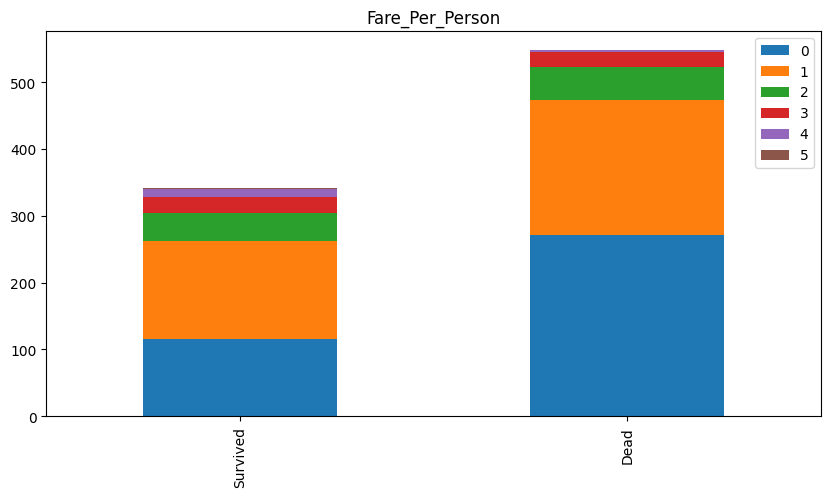

In [66]:
bar_chart('Fare_Per_Person')

### FamilySize

In [67]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

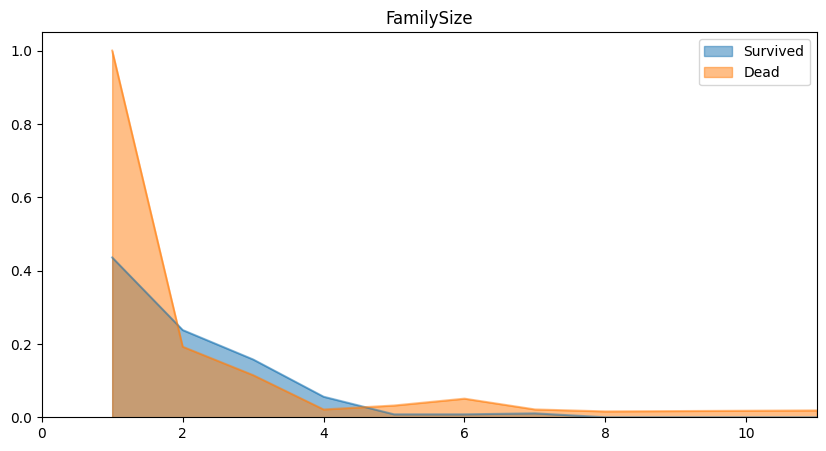

In [68]:
kde_chart('FamilySize', 'area')

This graph clearly shows that single people are more likely to die and people with families between 2 and 4 people are more likely to survive.

In [69]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Qualification,Deck,Age_Class,Fare_Per_Person,FamilySize
0,892,3,0,5,0,0,330911,0,2,0,2.0,15,0,1
1,893,3,1,6,1,0,363272,0,0,2,2.0,18,0,2
2,894,2,0,6,0,0,240276,1,2,0,2.0,12,1,1
3,895,3,0,3,0,0,315154,1,0,0,2.0,9,1,1
4,896,3,1,2,1,1,3101298,1,0,2,2.0,6,0,3


In [70]:
train_test = [train, test]

In [71]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for d in train_test:
    d['FamilySize'] = d['FamilySize'].map(family_mapping)

In [72]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Qualification,Deck,Age_Class,Fare_Per_Person,FamilySize
0,1,0,3,0,2,1,0,A/5 21171,0,0,0,2.0,6,0,0.4
1,2,1,1,1,5,1,0,PC 17599,3,1,2,0.5,5,1,0.4
2,3,1,3,1,3,0,0,STON/O2. 3101282,1,0,1,2.0,9,1,0.0
3,4,1,1,1,5,1,0,113803,3,0,2,0.5,5,1,0.4
4,5,0,3,0,5,0,0,373450,1,0,0,2.0,15,1,0.0


In [73]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Qualification,Deck,Age_Class,Fare_Per_Person,FamilySize
0,892,3,0,5,0,0,330911,0,2,0,2.0,15,0,0.0
1,893,3,1,6,1,0,363272,0,0,2,2.0,18,0,0.4
2,894,2,0,6,0,0,240276,1,2,0,2.0,12,1,0.0
3,895,3,0,3,0,0,315154,1,0,0,2.0,9,1,0.0
4,896,3,1,2,1,1,3101298,1,0,2,2.0,6,0,0.8


**we will drop some unused features**

In [74]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [75]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 10), (891,))

In [76]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Embarked,Qualification,Deck,Age_Class,Fare_Per_Person,FamilySize
0,3,0,2,0,0,0,2.0,6,0,0.4
1,1,1,5,3,1,2,0.5,5,1,0.4
2,3,1,3,1,0,1,2.0,9,1,0.0
3,1,1,5,3,0,2,0.5,5,1,0.4
4,3,0,5,1,0,0,2.0,15,1,0.0
5,3,0,4,1,2,0,2.0,12,1,0.0
6,1,0,6,3,0,0,1.0,6,3,0.0
7,3,0,0,2,0,3,2.0,0,0,1.6
8,3,1,3,1,0,2,2.0,9,0,0.8
9,2,1,1,2,1,2,2.0,2,1,0.4


In [77]:
train.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age                0
Fare               0
Embarked           0
Qualification      0
Deck               0
Age_Class          0
Fare_Per_Person    0
FamilySize         0
dtype: int64

In [78]:
test.isnull().sum()

PassengerId        0
Pclass             0
Sex                0
Age                0
Fare               0
Embarked           0
Qualification      0
Deck               0
Age_Class          0
Fare_Per_Person    0
FamilySize         0
dtype: int64

## Models
### Imports

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold, cross_val_score

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    int64  
 3   Age              891 non-null    int32  
 4   Fare             891 non-null    int32  
 5   Embarked         891 non-null    int64  
 6   Qualification    891 non-null    int64  
 7   Deck             891 non-null    float64
 8   Age_Class        891 non-null    int64  
 9   Fare_Per_Person  891 non-null    int32  
 10  FamilySize       891 non-null    float64
dtypes: float64(2), int32(3), int64(6)
memory usage: 66.3 KB


### Cross Validation (K-fold)

In [81]:
k_fold = KFold(n_splits=20, shuffle=True, random_state=0)

In [82]:
def testing_fun(clf):
    scoring = 'accuracy'
    score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
    print(f"Scores: {score}")
    print(f"accuracy: {round(np.mean(score)*100, 2)}%")
    print(f"Standard Deviation: {round(score.std()*100, 2)}%")
    print(f"Min Score: {round(score.min()*100, 2)}%")
    return score

### KNN

In [83]:
clf = KNeighborsClassifier(n_neighbors=13)
score = testing_fun(clf)

Scores: [0.77777778 0.77777778 0.75555556 0.8        0.82222222 0.77777778
 0.75555556 0.75555556 0.8        0.73333333 0.8        0.79545455
 0.86363636 0.75       0.77272727 0.72727273 0.72727273 0.77272727
 0.79545455 0.81818182]
accuracy: 77.89%
Standard Deviation: 3.35%
Min Score: 72.73%


### Decision Tree

In [84]:
clf = DecisionTreeClassifier()
score = testing_fun(clf)

Scores: [0.86666667 0.77777778 0.77777778 0.75555556 0.8        0.8
 0.77777778 0.84444444 0.77777778 0.82222222 0.82222222 0.75
 0.86363636 0.84090909 0.84090909 0.79545455 0.70454545 0.77272727
 0.79545455 0.81818182]
accuracy: 80.02%
Standard Deviation: 3.97%
Min Score: 70.45%


### Random Forest

In [85]:
clf = RandomForestClassifier(n_estimators=100)
score = testing_fun(clf)

Scores: [0.84444444 0.77777778 0.82222222 0.77777778 0.71111111 0.84444444
 0.77777778 0.86666667 0.82222222 0.86666667 0.86666667 0.77272727
 0.88636364 0.81818182 0.88636364 0.77272727 0.72727273 0.81818182
 0.81818182 0.84090909]
accuracy: 81.59%
Standard Deviation: 4.84%
Min Score: 71.11%


In [86]:
clf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
score = testing_fun(clf)

C:\Users\thiba\.virtualenvs\kaggle-titanic-WROlLEGc\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\thiba\.virtualenvs\kaggle-titanic-WROlLEGc\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\thiba\.virtualenvs\kaggle-titanic-WROlLEGc\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

Scores: [0.86666667 0.8        0.8        0.8        0.77777778 0.84444444
 0.84444444 0.86666667 0.84444444 0.84444444 0.82222222 0.72727273
 0.88636364 0.79545455 0.84090909 0.81818182 0.75       0.84090909
 0.79545455 0.84090909]
accuracy: 82.03%
Standard Deviation: 3.88%
Min Score: 72.73%


C:\Users\thiba\.virtualenvs\kaggle-titanic-WROlLEGc\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


### XGBoost

In [87]:
clf = GradientBoostingClassifier(n_estimators=100)
score = testing_fun(clf)

Scores: [0.86666667 0.77777778 0.82222222 0.77777778 0.77777778 0.84444444
 0.8        0.86666667 0.82222222 0.88888889 0.82222222 0.79545455
 0.88636364 0.77272727 0.81818182 0.79545455 0.77272727 0.81818182
 0.81818182 0.81818182]
accuracy: 81.81%
Standard Deviation: 3.57%
Min Score: 77.27%


### Naive Bayes

In [88]:
clf = GaussianNB()
score = testing_fun(clf)

Scores: [0.93333333 0.77777778 0.73333333 0.8        0.75555556 0.8
 0.73333333 0.8        0.77777778 0.64444444 0.84444444 0.75
 0.84090909 0.65909091 0.86363636 0.72727273 0.77272727 0.90909091
 0.81818182 0.86363636]
accuracy: 79.02%
Standard Deviation: 7.22%
Min Score: 64.44%


### SVM

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(C = 30, gamma = 0.01))
score = testing_fun(clf)

Scores: [0.84444444 0.8        0.8        0.8        0.8        0.84444444
 0.82222222 0.82222222 0.84444444 0.84444444 0.86666667 0.75
 0.86363636 0.79545455 0.81818182 0.84090909 0.81818182 0.86363636
 0.81818182 0.84090909]
accuracy: 82.49%
Standard Deviation: 2.82%
Min Score: 75.0%


In [90]:
clf = SVC()
score = testing_fun(clf)

Scores: [0.8        0.75555556 0.68888889 0.88888889 0.82222222 0.84444444
 0.8        0.8        0.75555556 0.8        0.84444444 0.75
 0.90909091 0.72727273 0.79545455 0.81818182 0.79545455 0.88636364
 0.81818182 0.86363636]
accuracy: 80.82%
Standard Deviation: 5.44%
Min Score: 68.89%


### Test dataset

### With SVM

In [91]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [92]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})
submission.to_csv('./output/submission.csv', index=False)

In [93]:
submission = pd.read_csv('./output/submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### With XGBoost

In [94]:
clf = GradientBoostingClassifier(n_estimators=50)
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [95]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})
submission.to_csv('./output/submission.csv', index=False)

In [96]:
submission = pd.read_csv('./output/submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Kaggle Score = 0.77272 #8706 (SVM)

## With RandomForest

In [97]:
clf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

C:\Users\thiba\.virtualenvs\kaggle-titanic-WROlLEGc\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [98]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})
submission.to_csv('./output/submission.csv', index=False)

In [99]:
submission = pd.read_csv('./output/submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Kaggle Score = 0.77990 #2890/13959 : 20.7% (RandomForest)